In [1]:
import pandas as pd
import numpy as np
import spacy
import string
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pyplot import imread
from wordcloud import WordCloud

In [2]:
samp=pd.read_excel("E:/SHRADDHA/DA-DS Assignments/DS Assignments/11.A_Text Mining/sample_us.xlsx")
samp

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,18778586,RDIJS7QYB6XNR,B00EDBY7X8,122952789,Monopoly Junior Board Game,Toys,5,0,0,N,Y,Five Stars,Excellent!!!,2015-08-31
1,US,24769659,R36ED1U38IELG8,B00D7JFOPC,952062646,56 Pieces of Wooden Train Track Compatible wit...,Toys,5,0,0,N,Y,Good quality track at excellent price,Great quality wooden track (better than some o...,2015-08-31
2,US,44331596,R1UE3RPRGCOLD,B002LHA74O,818126353,Super Jumbo Playing Cards by S&S Worldwide,Toys,2,1,1,N,Y,Two Stars,Cards are not as big as pictured.,2015-08-31
3,US,23310293,R298788GS6I901,B00ARPLCGY,261944918,Barbie Doll and Fashions Barbie Gift Set,Toys,5,0,0,N,Y,my daughter loved it and i liked the price and...,my daughter loved it and i liked the price and...,2015-08-31
4,US,38745832,RNX4EXOBBPN5,B00UZOPOFW,717410439,Emazing Lights eLite Flow Glow Sticks - Spinni...,Toys,1,1,1,N,Y,DONT BUY THESE!,Do not buy these! They break very fast I spun ...,2015-08-31
5,US,13394189,R3BPETL222LMIM,B009B7F6CA,873028700,Melissa & Doug Water Wow Coloring Book - Vehicles,Toys,5,0,0,N,Y,Five Stars,Great item. Pictures pop thru and add detail a...,2015-08-31
6,US,2749569,R3SORMPJZO3F2J,B0101EHRSM,723424342,Big Bang Cosmic Pegasus (Pegasis) Metal 4D Hig...,Toys,3,2,2,N,Y,Three Stars,"To keep together, had to use crazy glue.",2015-08-31
7,US,41137196,R2RDOJQ0WBZCF6,B00407S11Y,383363775,Fun Express Insect Finger Puppets 12ct Toy,Toys,5,0,0,N,Y,Five Stars,I was pleased with the product.,2015-08-31
8,US,433677,R2B8VBEPB4YEZ7,B00FGPU7U2,780517568,Fisher-Price Octonauts Shellington's On-The-Go...,Toys,5,0,0,N,Y,Five Stars,Children like it,2015-08-31
9,US,1297934,R1CB783I7B0U52,B0013OY0S0,269360126,Claw Climber Goliath/ Disney's Gargoyles,Toys,1,0,1,N,Y,Shame on the seller !!!,Showed up not how it's shown . Was someone's o...,2015-08-31


In [3]:
samp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   marketplace        49 non-null     object        
 1   customer_id        49 non-null     int64         
 2   review_id          49 non-null     object        
 3   product_id         49 non-null     object        
 4   product_parent     49 non-null     int64         
 5   product_title      49 non-null     object        
 6   product_category   49 non-null     object        
 7   star_rating        49 non-null     int64         
 8   helpful_votes      49 non-null     int64         
 9   total_votes        49 non-null     int64         
 10  vine               49 non-null     object        
 11  verified_purchase  49 non-null     object        
 12  review_headline    49 non-null     object        
 13  review_body        49 non-null     object        
 14  review_date 

In [4]:
samp1=samp.drop(samp.columns[0:13],axis=1)
samp1.head()

,review_body,review_date
0,Excellent!!!,2015-08-31
1,Great quality wooden track (better than some o...,2015-08-31
2,Cards are not as big as pictured.,2015-08-31
3,my daughter loved it and i liked the price and...,2015-08-31
4,Do not buy these! They break very fast I spun ...,2015-08-31


In [5]:
samp2=samp1.drop(samp1.columns[1],axis=1)
samp2.head()

,review_body
0,Excellent!!!
1,Great quality wooden track (better than some o...
2,Cards are not as big as pictured.
3,my daughter loved it and i liked the price and...
4,Do not buy these! They break very fast I spun ...


In [6]:
samp3=samp2.rename({'review_body':'x'},axis=1)
samp3.head()

,x
0,Excellent!!!
1,Great quality wooden track (better than some o...
2,Cards are not as big as pictured.
3,my daughter loved it and i liked the price and...
4,Do not buy these! They break very fast I spun ...


In [7]:
samp3=[x.strip() for x in samp3.x]
samp3=[x for x in samp3 if x]
samp3[0:10]

['Excellent!!!',
 'Great quality wooden track (better than some others we have tried). Perfect match to the various vintages of Thomas track that we already have. There is enough track here to have fun and get creative incorporating your key pieces with track splits, loops and bends.',
 'Cards are not as big as pictured.',
 'my daughter loved it and i liked the price and it came to me rather than shopping with a ton of people around me. Amazon is the Best way to shop!',
 "Do not buy these! They break very fast I spun then for 15 minutes and the end flew off don't waste your money. They are made from cheap plastic and have cracks in them. Buy the poi balls they work a lot better if you only have limited funds.",
 'Great item. Pictures pop thru and add detail as &#34;painted.&#34;  Pictures dry and it can be repainted.',
 'To keep together, had to use crazy  glue.',
 'I was pleased with the product.',
 'Children like it',
 "Showed up not how it's shown . Was someone's old toy. with paint

In [8]:
#joining the list into one string
text=''.join(samp3)
len(text)

8200

In [9]:
#punctuation
no_punc_text=text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'ExcellentGreat quality wooden track better than some others we have tried Perfect match to the various vintages of Thomas track that we already have There is enough track here to have fun and get creative incorporating your key pieces with track splits loops and bendsCards are not as big as picturedmy daughter loved it and i liked the price and it came to me rather than shopping with a ton of people around me Amazon is the Best way to shopDo not buy these They break very fast I spun then for 15 minutes and the end flew off dont waste your money They are made from cheap plastic and have cracks in them Buy the poi balls they work a lot better if you only have limited fundsGreat item Pictures pop thru and add detail as 34painted34  Pictures dry and it can be repaintedTo keep together had to use crazy  glueI was pleased with the productChildren like itShowed up not how its shown  Was someones old toy with paint on itReally liked these They were a little larger than I thought but still fun

In [10]:
#stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [11]:
#tokenization
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['ExcellentGreat', 'quality', 'wooden', 'track', 'better', 'than', 'some', 'others', 'we', 'have', 'tried', 'Perfect', 'match', 'to', 'the', 'various', 'vintages', 'of', 'Thomas', 'track', 'that', 'we', 'already', 'have', 'There', 'is', 'enough', 'track', 'here', 'to', 'have', 'fun', 'and', 'get', 'creative', 'incorporating', 'your', 'key', 'pieces', 'with', 'track', 'splits', 'loops', 'and', 'bendsCards', 'are', 'not', 'as', 'big', 'as']


In [12]:
len(text_tokens)

1478

In [13]:
#remove stopwords
import nltk
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['ExcellentGreat', 'quality', 'wooden', 'track', 'better', 'others', 'tried', 'Perfect', 'match', 'various', 'vintages', 'Thomas', 'track', 'already', 'There', 'enough', 'track', 'fun', 'get', 'creative', 'incorporating', 'key', 'pieces', 'track', 'splits', 'loops', 'bendsCards', 'big', 'picturedmy', 'daughter', 'loved', 'liked', 'price', 'came', 'rather', 'shopping', 'ton', 'people', 'around', 'Amazon']


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [14]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['excellentgreat', 'quality', 'wooden', 'track', 'better', 'others', 'tried', 'perfect', 'match', 'various', 'vintages', 'thomas', 'track', 'already', 'there', 'enough', 'track', 'fun', 'get', 'creative', 'incorporating', 'key', 'pieces', 'track', 'splits']


In [15]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['excellentgreat', 'qualiti', 'wooden', 'track', 'better', 'other', 'tri', 'perfect', 'match', 'variou', 'vintag', 'thoma', 'track', 'alreadi', 'there', 'enough', 'track', 'fun', 'get', 'creativ', 'incorpor', 'key', 'piec', 'track', 'split', 'loop', 'bendscard', 'big', 'picturedmi', 'daughter', 'love', 'like', 'price', 'came', 'rather', 'shop', 'ton', 'peopl', 'around', 'amazon']


In [16]:
nlp = spacy.load('en_core_web_sm') 

In [17]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

ExcellentGreat quality wooden track better others tried Perfect match various vintages Thomas track already There enough track fun get creative incorporating key pieces track splits loops bendsCards big picturedmy daughter loved liked price came rather shopping ton people around Amazon


In [18]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['ExcellentGreat', 'quality', 'wooden', 'track', 'well', 'other', 'try', 'Perfect', 'match', 'various', 'vintage', 'Thomas', 'track', 'already', 'there', 'enough', 'track', 'fun', 'get', 'creative', 'incorporate', 'key', 'piece', 'track', 'split']


# Feature Extraction

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(stemmed_tokens)
X

<887x538 sparse matrix of type '<class 'numpy.int64'>'
	with 862 stored elements in Compressed Sparse Row format>

In [20]:
print(vectorizer.get_feature_names()[0:50])

['15', '150', '20', '34knockoff34', '34painted34', '34wow', '35', '50', '6yrmi', '7yr', '89', 'abl', 'abovemor', 'absolout', 'absolut', 'access', 'ad', 'add', 'ador', 'advent', 'advertis', 'advertisedcom', 'againmi', 'age', 'aid', 'alien', 'all', 'almost', 'along', 'alreadi', 'also', 'altern', 'alway', 'amazon', 'and', 'anim', 'apart', 'are', 'armi', 'around', 'ask', 'assembl', 'at', 'attach', 'attract', 'away', 'awayawesom', 'awesom', 'back', 'ball']


# Generate Wordcloud

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

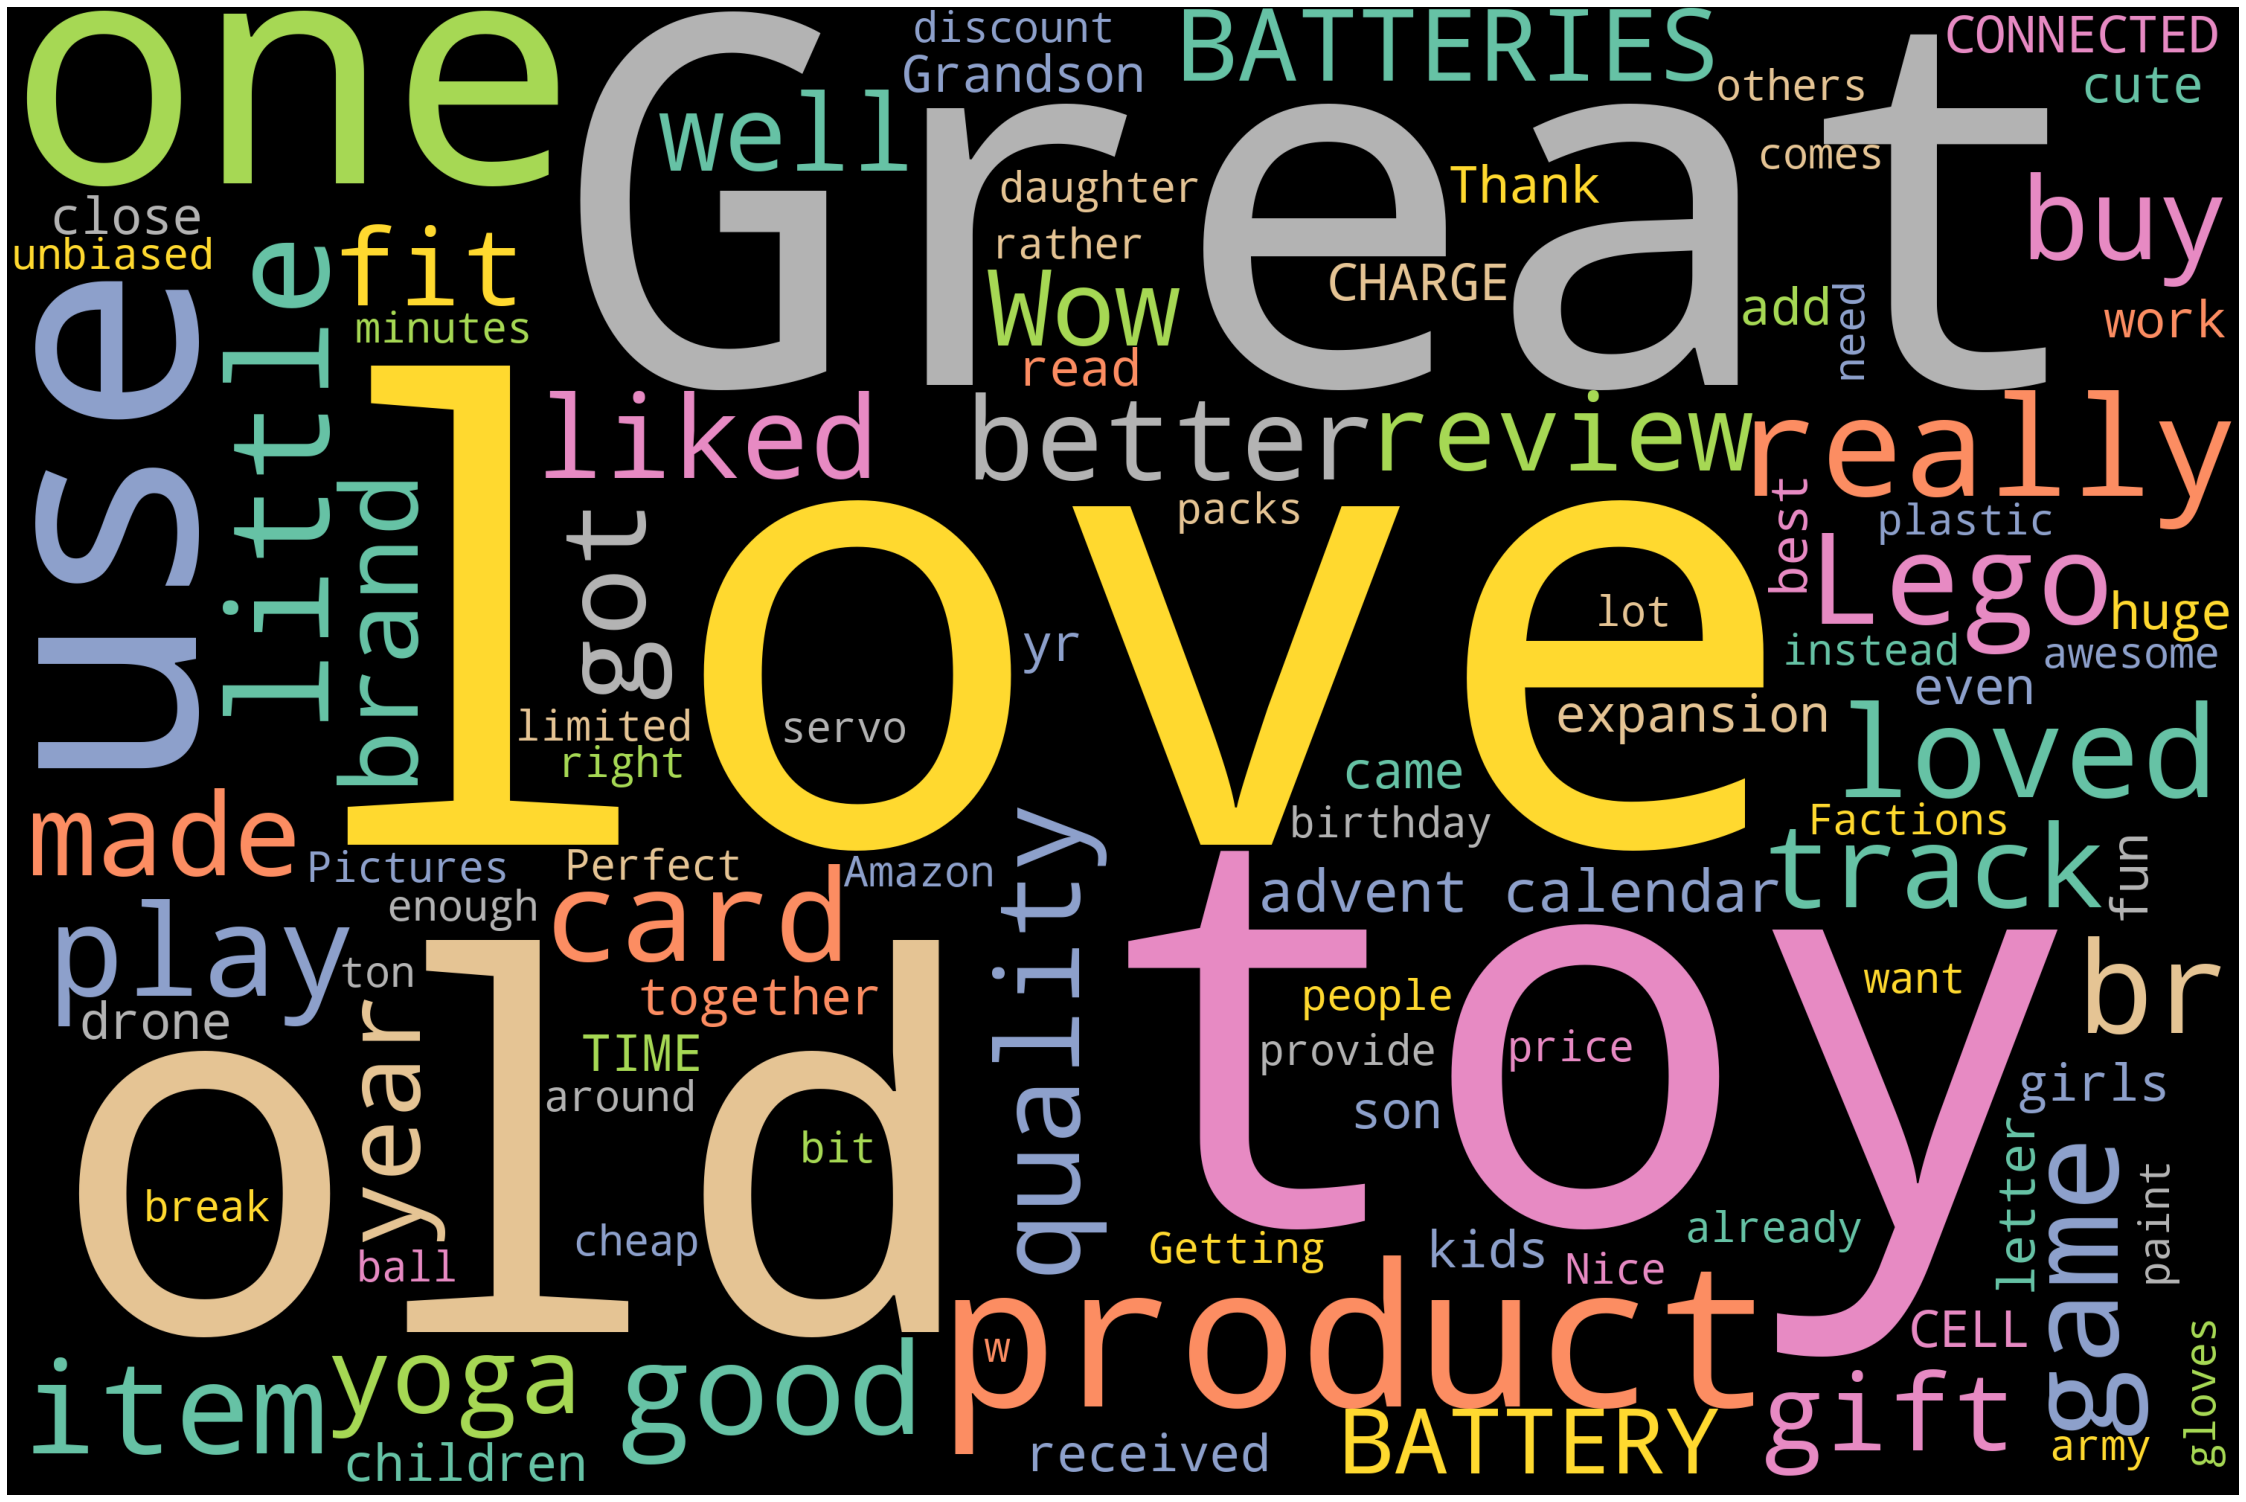

In [22]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

# Named Entity Recognition

In [26]:
clean_text=' '.join(lemmas)
clean_text

'ExcellentGreat quality wooden track well other try Perfect match various vintage Thomas track already there enough track fun get creative incorporate key piece track split loop bendscard big picturedmy daughter love like price come rather shop ton people around Amazon Best way shopdo buy they break fast I spin 15 minute end fly do not waste money they make cheap plastic crack buy poi ball work lot well limited fundsGreat item Pictures pop thru add detail 34painted34 Pictures dry repaintedto keep together use crazy glueI please productChildren like itshowe show be someone old toy paint itreally like they little larger I think still funnice huge balloon have local grocery store fill small fee totally worth itgreat deala AdvertisedComes w 15 servo expect spend 150 good servo immediately stock one break right awayawesome ThanksI get item son play around the close relevance I item like army I train camera rc bot this thing awesome test range get somewhere close 50 yard without issue get co

In [28]:
#Parts of Speech tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_text
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [31]:
for token in doc_block[10:50]:
    print(token,token.pos_)

vintage NOUN
Thomas PROPN
track NOUN
already ADV
there ADV
enough ADJ
track NOUN
fun NOUN
get VERB
creative ADJ
incorporate VERB
key ADJ
piece NOUN
track NOUN
split PROPN
loop NOUN
bendscard NOUN
big ADJ
picturedmy PROPN
daughter NOUN
love NOUN
like ADP
price NOUN
come VERB
rather ADV
shop VERB
ton NOUN
people NOUN
around ADP
Amazon PROPN
Best PROPN
way NOUN
shopdo NOUN
buy VERB
they PRON
break VERB
fast ADV
I PRON
spin VERB
15 NUM


In [33]:
#filtering for nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[50:100])

['funnice', 'balloon', 'grocery', 'store', 'fill', 'fee', 'itgreat', 'deala', 'servo', 'expect', 'spend', 'servo', 'stock', 'break', 'get', 'item', 'son', 'play', 'relevance', 'item', 'army', 'train', 'camera', 'bot', 'thing', 'test', 'range', 'get', 'yard', 'issue', 'get', 'control', 'bit', 'minute', 'feel', 'drone', 'come', 'fly', 'sync', 'controller', 'fan', 'drone', 'concern', 'receive', 'product', 'discount', 'birthday', 'grandson', 'love', 'product']


In [34]:
#counting the nouns and verbs tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['words','counts']
wd_df[0:10]

,words,counts
0,love,12
1,use,8
2,get,7
3,toy,7
4,play,6
5,battery,6
6,come,5
7,make,5
8,item,5
9,game,5


<AxesSubplot:title={'center':'Top 10 Nouns & Verbs'}, xlabel='words'>

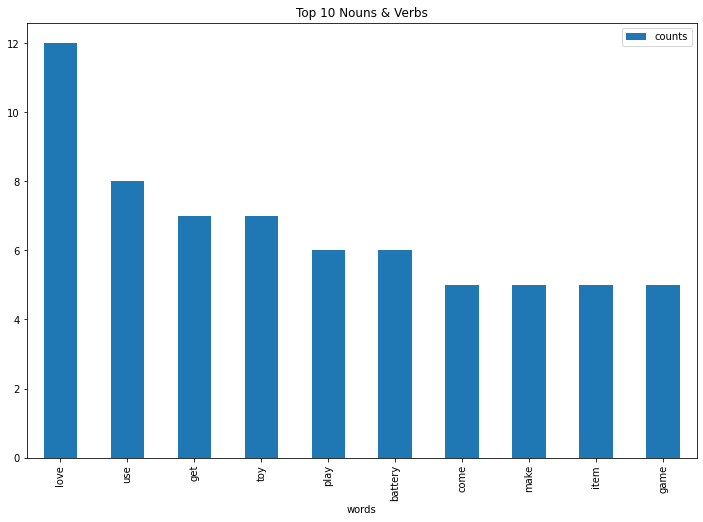

In [36]:
#visualizing results
wd_df[0:10].plot.bar(x='words',figsize=(12,8),title='Top 10 Nouns & Verbs')

# Sentiment Analysis

In [38]:
from nltk import tokenize
sentence=tokenize.sent_tokenize(' '.join(samp3))
sentence

['Excellent!!!',
 'Great quality wooden track (better than some others we have tried).',
 'Perfect match to the various vintages of Thomas track that we already have.',
 'There is enough track here to have fun and get creative incorporating your key pieces with track splits, loops and bends.',
 'Cards are not as big as pictured.',
 'my daughter loved it and i liked the price and it came to me rather than shopping with a ton of people around me.',
 'Amazon is the Best way to shop!',
 'Do not buy these!',
 "They break very fast I spun then for 15 minutes and the end flew off don't waste your money.",
 'They are made from cheap plastic and have cracks in them.',
 'Buy the poi balls they work a lot better if you only have limited funds.',
 'Great item.',
 'Pictures pop thru and add detail as &#34;painted.&#34;  Pictures dry and it can be repainted.',
 'To keep together, had to use crazy  glue.',
 'I was pleased with the product.',
 "Children like it Showed up not how it's shown .",
 "Was s

In [40]:
sent_df=pd.DataFrame(sentence,columns=['sentence'])
sent_df

,sentence
0,Excellent!!!
1,Great quality wooden track (better than some o...
2,Perfect match to the various vintages of Thoma...
3,There is enough track here to have fun and get...
4,Cards are not as big as pictured.
...,...
100,love it Absolutely one of the best traps in th...
101,It is never a dead and always live since you c...
102,It's main power is that it can stop any card.
103,Hopefully this card comes off the Forbidden/Li...


In [41]:
#Emotion Lexicon-Affin
affin=pd.read_csv("E:\SHRADDHA\ipynb/Afinn.csv",sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [43]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [44]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=1
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [45]:
#manual testing
calculate_sentiment(text='nice')

4

In [46]:
#calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      4
1      4
2      4
3      7
4      2
      ..
100    6
101   -3
102    0
103    2
104    9
Name: sentiment_value, Length: 105, dtype: int64

In [47]:
#how many words are there in a sentence
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       1
1      11
2      13
3      21
4       7
       ..
100    11
101    19
102    10
103     9
104    13
Name: word_count, Length: 105, dtype: int64

In [49]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
101,It is never a dead and always live since you c...,-3,19
13,"To keep together, had to use crazy glue.",-1,8
73,Completely shredded and no longer of use.,0,7
10,Buy the poi balls they work a lot better if yo...,0,15
8,They break very fast I spun then for 15 minute...,0,19
...,...,...,...
63,The children LOVED them and best part was that...,9,16
88,"The colors are bright, the patterns are fun & ...",9,15
104,really soft and cute baby loved it - so attrac...,9,13
22,Great deal As Advertised Comes w a 15$ servo s...,11,29


In [50]:
#sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    105.000000
mean       3.133333
std        2.627761
min       -3.000000
25%        1.000000
50%        3.000000
75%        4.000000
max       11.000000
Name: sentiment_value, dtype: float64

In [51]:
#negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
8,They break very fast I spun then for 15 minute...,0,19
10,Buy the poi balls they work a lot better if yo...,0,15
13,"To keep together, had to use crazy glue.",-1,8
57,I would have preferred quality (and would have...,0,24
73,Completely shredded and no longer of use.,0,7
98,My kids know all of their letter sounds and sh...,0,22
101,It is never a dead and always live since you c...,-3,19
102,It's main power is that it can stop any card.,0,10


In [52]:
#positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>=0]

,sentence,sentiment_value,word_count
0,Excellent!!!,4,1
1,Great quality wooden track (better than some o...,4,11
2,Perfect match to the various vintages of Thoma...,4,13
3,There is enough track here to have fun and get...,7,21
4,Cards are not as big as pictured.,2,7
...,...,...,...
99,My 5 year old son loves this.,4,7
100,love it Absolutely one of the best traps in th...,6,11
102,It's main power is that it can stop any card.,0,10
103,Hopefully this card comes off the Forbidden/Li...,2,9


In [54]:
#adding index column
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Excellent!!!,4,1,0
1,Great quality wooden track (better than some o...,4,11,1
2,Perfect match to the various vintages of Thoma...,4,13,2
3,There is enough track here to have fun and get...,7,21,3
4,Cards are not as big as pictured.,2,7,4
...,...,...,...,...
100,love it Absolutely one of the best traps in th...,6,11,100
101,It is never a dead and always live since you c...,-3,19,101
102,It's main power is that it can stop any card.,0,10,102
103,Hopefully this card comes off the Forbidden/Li...,2,9,103


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

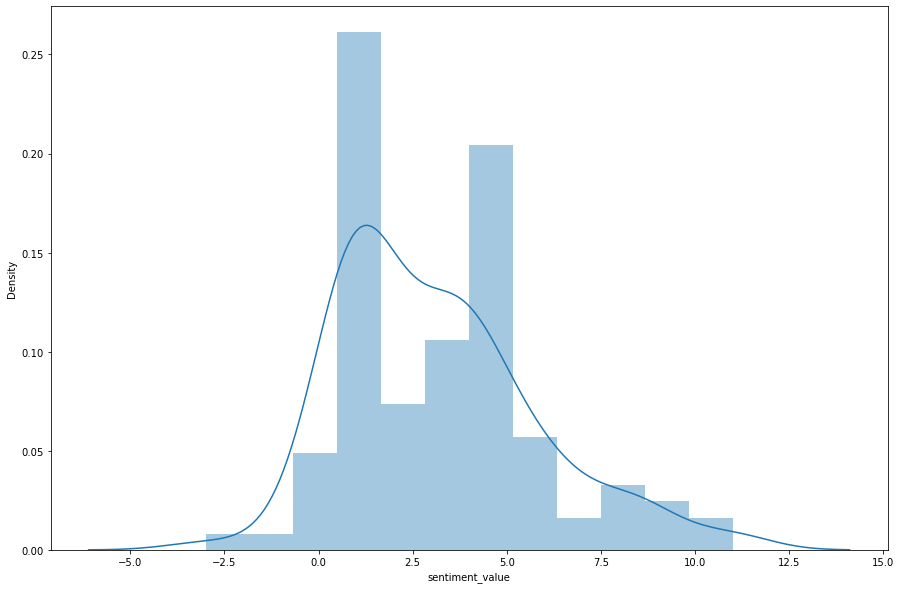

In [56]:
#plotting the sentiment value of the whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

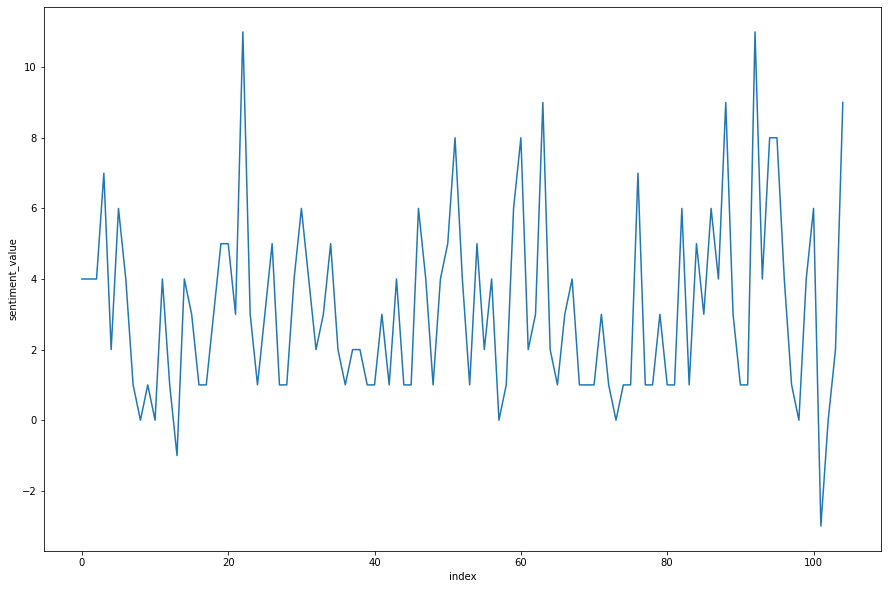

In [57]:
#plotting the line plot for the whole review
plt.figure(figsize=(15,10))
sns.lineplot(x='index',y='sentiment_value',data=sent_df)

<AxesSubplot:title={'center':'sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

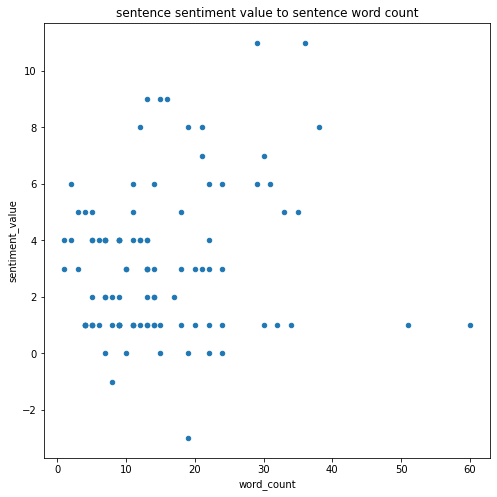

In [58]:
#correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='sentence sentiment value to sentence word count')